# Assignment 6 - Outlier Detection
## Data Mining

by Ardian - 2106638173

March 9th, 2024

Information System - Faculty of Computer Science

Universitas Indonesia

---

## Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

## 1. Menggunakan Python, diketahui data sebagai berikut [1, 2, 5, 1, 3, 100, 3, 5, 40, 45, 279, 130, 71]. Tentukan nilai Q1, Median, Q3, Inter-quartile range (IQR), kemudian Angka outlier dari data yang diberikan.



In [2]:
nums = [1, 2, 5, 1, 3, 100, 3, 5, 40, 45, 279, 130, 71]

### a. Q1

In [3]:
def Q1(nums):
  nums.sort()
  length = len(nums)
  index = length // 4

  if length % 4 != 1:
    return (nums[index - 1] + nums[index]) / 2
  else:
    return nums[index]

print("Q1:", Q1(nums))


Q1: 3


### b. Median

In [4]:
def median(n):
  nums.sort()
  length = len(nums)

  if length % 2 != 1:
    mid = length // 2
    return (nums[mid - 1] + nums[mid]) / 2

  return nums[length // 2]

print('Median:', median(nums))

Median: 5


### c. Q3

In [5]:
def Q3(nums):
  nums.sort()
  length = len(nums)
  index = 3 * length // 4

  if length % 4 != 1:
    return (nums[index - 1] + nums[index]) / 2
  else:
    return nums[index]

print("Q3:", Q3(nums))

Q3: 71


### d. IQR

In [6]:
def IQR(nums):
  return Q3(nums) - Q1(nums)

print("IQR:", IQR(nums))

IQR: 68


### e. Outlier dari data yang diberikan

In [7]:
def outliers(nums):
  q1 = Q1(nums)
  q3 = Q3(nums)
  iqr = IQR(nums)

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = [num for num in nums if num < lower_bound or num > upper_bound]

  return outliers

print("Outliers:", outliers(nums))

Outliers: [279]


## 2. Lakukan proses reduksi dimensi dataset marketing campaign dengan menggunakan PCA hingga menjadi 2 dimensi dengan kolom yang telah dipilih. Data hasil reduksi ini akan digunakan untuk mengerjakan nomor 3 dan 4 juga. Kemudian, dengan menggunakan algoritma LOF (Local Outlier Factor) tentukan banyaknya customer yang outlier dan ID mereka. Kemudian buatlah scatter plot yang memvisualisasikan data outlier dan normal.

In [8]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Mining by Universitas Indonesia/Assignment 6 - Outlier Detection/marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,88,546,8,4,7,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,1,6,1,2,5,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,49,127,8,10,4,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,4,20,2,4,6,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,43,118,5,6,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,43,182,9,4,5,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,0,30,8,5,7,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,48,217,2,13,6,0,1,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,30,214,6,10,3,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4   Income             2240 non-null   int64 
 5   Kidhome            2240 non-null   int64 
 6   Teenhome           2240 non-null   int64 
 7   Dt_Customer        2240 non-null   object
 8   Recency            2240 non-null   int64 
 9   MntFruits          2240 non-null   int64 
 10  MntMeatProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumStorePurchases  2240 non-null   int64 
 13  NumWebVisitsMonth  2240 non-null   int64 
 14  AcceptedCmp1       2240 non-null   int64 
 15  AcceptedCmp2       2240 non-null   int64 
 16  Complain           2240 non-null   int64 


In [10]:
df_for_outlier = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

df_for_outlier.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52023.799554,0.444196,0.506250,49.109375,26.302232,166.950000,4.084821,5.790179,5.316518,0.072768,0.074554,0.009375,0.149107
std,11.984069,25402.200155,0.538398,0.544538,28.962453,39.773434,225.715373,2.778714,3.250958,2.426645,0.259813,0.262728,0.096391,0.356274
min,1893.000000,1021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,34939.500000,0.000000,0.000000,24.000000,1.000000,16.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51277.000000,0.000000,0.000000,49.000000,8.000000,67.000000,4.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68363.250000,1.000000,1.000000,74.000000,33.000000,232.000000,6.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,199.000000,1725.000000,27.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000


### PCA:

In [11]:
# Gunakan PCA untuk mereduksi dimensi dari dataframe df_for_outlier menjadi 2 dimensi, tampilkan juga dataframe setelah jadi 2 dimensi
scaler = StandardScaler()
df_for_outlier_scaled = scaler.fit_transform(df_for_outlier)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_for_outlier_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

df_pca = pd.concat([df.drop(columns=df_for_outlier.columns), pca_df], axis=1)

df_pca

,ID,Education,Marital_Status,Dt_Customer,PC1,PC2
0,5524,Graduation,Single,2012-09-04,1.952169,1.030911
1,2174,Graduation,Single,2014-03-08,-1.702206,-1.022287
2,4141,Graduation,Together,2013-08-21,1.856207,-0.144836
3,6182,Graduation,Together,2014-02-10,-1.957969,1.281537
4,5324,PhD,Married,2014-01-19,-0.207101,0.803803
...,...,...,...,...,...,...
2235,10870,Graduation,Married,2013-06-13,0.859819,-1.109081
2236,4001,PhD,Together,2014-06-10,-1.201494,-1.911845
2237,7270,Graduation,Divorced,2014-01-25,1.549694,0.127283
2238,8235,Master,Together,2014-01-24,1.756267,-1.382045


### LOF:

Berikut ID 6 pelanggan yang terdeteksi outlier oleh Local Outlier Factor:
    1. 3005
    2. 9010
    3. 1763
    4. 5350
    5. 9242
    6. 9432


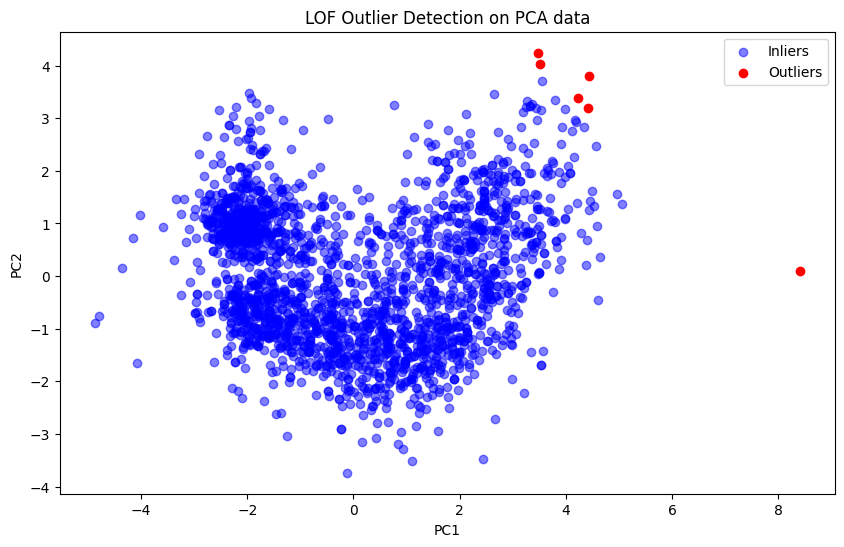

In [79]:
# Terapkan LOF dengan hyperparameter n_neighbors = 1500. Tentukan ID pelanggan mana saja yang outlier
LOF = LocalOutlierFactor(n_neighbors=1500)

LOF_anomaly_scores = LOF.fit_predict(df_pca[['PC1', 'PC2']])

LOF_outliers = df_pca[LOF_anomaly_scores == -1]
LOF_inliers = df_pca[LOF_anomaly_scores != -1]

print("Berikut ID", len(LOF_outliers), "pelanggan yang terdeteksi outlier oleh Local Outlier Factor:")
counter = 1
for id in LOF_outliers['ID'].tolist():
  print(f"    {counter}. {id}")
  counter+=1

plt.figure(figsize=(10, 6))
plt.scatter(LOF_inliers['PC1'], LOF_inliers['PC2'], c='blue', label='Inliers', alpha=0.5)
plt.scatter(LOF_outliers['PC1'], LOF_outliers['PC2'], c='red', label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('LOF Outlier Detection on PCA data')
plt.legend()

plt.show()

### 3. Dengan menggunakan algoritma DBSCAN tentukan banyaknya customer yang outlier dan ID mereka. Kemudian buatlah scatter plot yang memvisualisasikan data outlier dan normal.

Berikut ID 0 pelanggan yang terdeteksi outlier oleh DBSCAN:


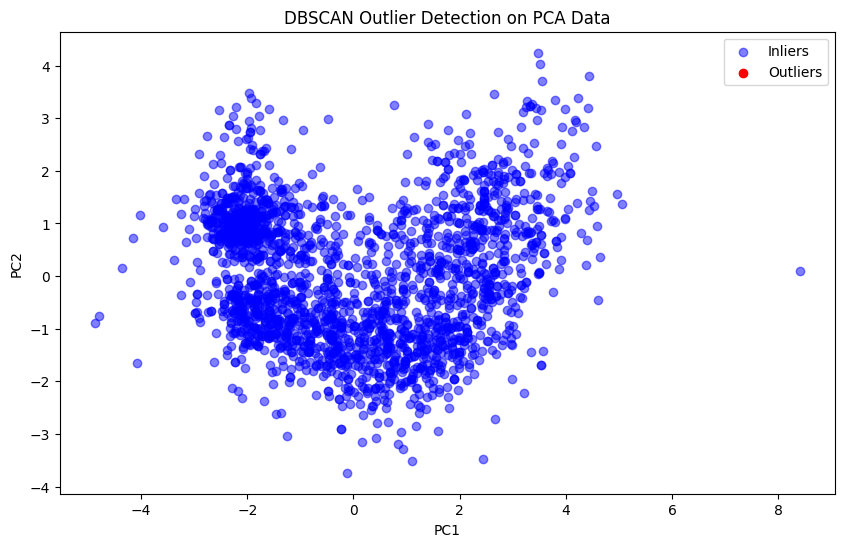

In [86]:
# Terapkan DBSCAN dengan hyperparameter epsilon = 1500 dan minimum sample = 10. Tentukan ID pelanggan mana saja yang outlier
dbscan = DBSCAN(eps=1500, min_samples=10)
dbscan.fit(df_pca[['PC1', 'PC2']])

dbscan_outliers = df_pca[dbscan.labels_ == -1]
dbscan_inliers = df_pca[dbscan.labels_ != -1]

print("Berikut ID", len(dbscan_outliers), "pelanggan yang terdeteksi outlier oleh DBSCAN:")
counter = 1
for id in dbscan_outliers['ID'].tolist():
  print(f"    {counter}. {id}")
  counter+=1

plt.figure(figsize=(10, 6))
plt.scatter(dbscan_inliers['PC1'], dbscan_inliers['PC2'], c='blue', label='Inliers', alpha=0.5)
plt.scatter(dbscan_outliers['PC1'], dbscan_outliers['PC2'], c='red', label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Outlier Detection on PCA Data')
plt.legend()

plt.show()

> Tidak ada outlier yang terdeteksi karena nilai epsilon yang diberikan terlalu besar.

## 4. Dengan menggunakan algoritma Isolation Forest tentukan banyaknya customer yang outlier dan ID mereka. Kemudian buatlah scatter plot yang memvisualisasikan data outlier dan normal.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Berikut ID 6 pelanggan yang terdeteksi outlier oleh Isolation Forest:
    1. 3005
    2. 9010
    3. 1763
    4. 5350
    5. 9242
    6. 477


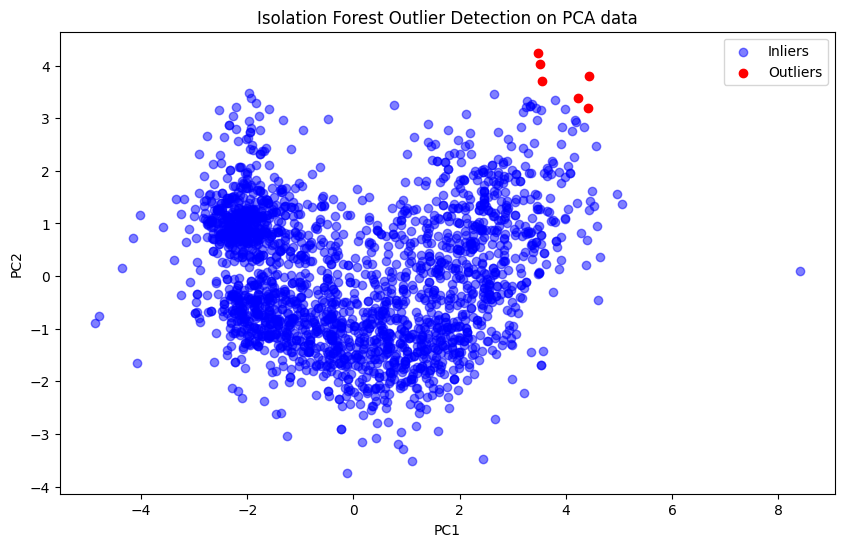

In [81]:
# Terapkan Isolation Forest dengan hyperparameter n_estimators = 100, contamination = 0.0024, max_samples = 'auto'. Tentukan ID pelanggan mana saja yang outlier
IF = IsolationForest(n_estimators=100, contamination=0.0024, max_samples='auto')
IF.fit(df_pca[['PC1', 'PC2']])
IF_anomaly_scores = IF.predict(df_pca[['PC1', 'PC2']])

IF_outliers = df_pca[IF_anomaly_scores == -1]
IF_inliers = df_pca[IF_anomaly_scores != -1]

print("Berikut ID", len(IF_outliers), "pelanggan yang terdeteksi outlier oleh Isolation Forest:")
counter = 1
for id in IF_outliers['ID'].tolist():
  print(f"    {counter}. {id}")
  counter+=1

plt.figure(figsize=(10, 6))
plt.scatter(IF_inliers['PC1'], IF_inliers['PC2'], c='blue', label='Inliers', alpha=0.5)
plt.scatter(IF_outliers['PC1'], IF_outliers['PC2'], c='red', label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Isolation Forest Outlier Detection on PCA data')
plt.legend()

plt.show()

## 5. Dari algoritma yang telah disimulasikan pada nomor 2 sampai 4, manakah ID pelanggan yang dianggap outlier oleh ketiga algoritma?

In [87]:
# Tentukan ID pelanggan yang dideteksi outlier oleh ketiga algoritma
print("ID pelanggan yang dideteksi outlier oleh ketiga algoritma:")
print()

counter = 1
for id in list(set(LOF_outliers['ID']).intersection(dbscan_outliers['ID'], IF_outliers['ID'])):
  print(f"    {counter}. {id}")
  counter+=1

ID pelanggan yang dideteksi outlier oleh ketiga algoritma:



> Tidak ada, karena tidak ada outlier yang terdeteksi oleh DBSCAN.

### Fine tune DBSCAN:

Saya coba menggunakan epsilon = 0.75

Berikut ID 32 pelanggan yang terdeteksi outlier oleh DBSCAN:
    1. 5899
    2. 6565
    3. 5376
    4. 7829
    5. 11004
    6. 10089
    7. 1150
    8. 7274
    9. 1340
    10. 3225
    11. 895
    12. 3867
    13. 5956
    14. 5237
    15. 4303
    16. 10749
    17. 3005
    18. 1175
    19. 6862
    20. 8534
    21. 10637
    22. 1553
    23. 1763
    24. 11110
    25. 9242
    26. 3859
    27. 4676
    28. 6237
    29. 9931
    30. 4619
    31. 3520
    32. 9432


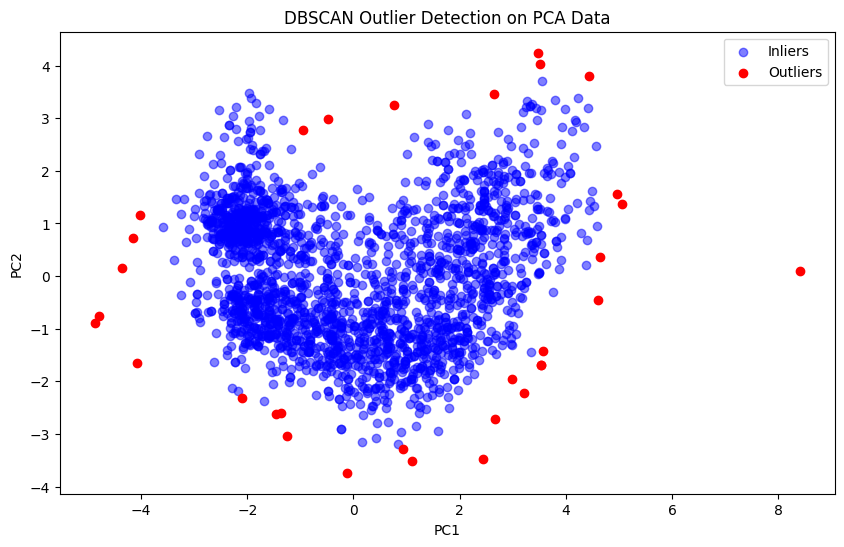

In [92]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(df_pca[['PC1', 'PC2']])

dbscan_outliers = df_pca[dbscan.labels_ == -1]
dbscan_inliers = df_pca[dbscan.labels_ != -1]

print("Berikut ID", len(dbscan_outliers), "pelanggan yang terdeteksi outlier oleh DBSCAN:")
counter = 1
for id in dbscan_outliers['ID'].tolist():
  print(f"    {counter}. {id}")
  counter+=1

plt.figure(figsize=(10, 6))
plt.scatter(dbscan_inliers['PC1'], dbscan_inliers['PC2'], c='blue', label='Inliers', alpha=0.5)
plt.scatter(dbscan_outliers['PC1'], dbscan_outliers['PC2'], c='red', label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Outlier Detection on PCA Data')
plt.legend()

plt.show()

> Outlier dapat terdeteksi dengan jumlah yang signifikan!

### Final answer:

In [93]:
print("ID pelanggan yang dideteksi outlier oleh ketiga algoritma:")
print()

counter = 1
for id in list(set(LOF_outliers['ID']).intersection(dbscan_outliers['ID'], IF_outliers['ID'])):
  print(f"    {counter}. {id}")
  counter+=1

ID pelanggan yang dideteksi outlier oleh ketiga algoritma:

    1. 9242
    2. 1763
    3. 3005
